# Кейс №2 «Прогнозирование конечных свойств новых композиционных материалов»
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
На выходе необходимо спрогнозировать следующие свойства получаемых композиционных материалов:
 - Модуль упругости при растяжении, ГПа
 - Прочность при растяжении, МПа


# РАЗДЕЛ 1. Разведочный анализ данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
%matplotlib inline 
sns.set(style="ticks")

## 1.1 Загрузка данных из файлов и формирование исходного Dataset

In [3]:
path_1 = r'./Data/X_bp.xlsx'
data_ishod_1 = pd.read_excel(path_1,index_col=0)
data_ishod_1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
path_2 = r'./Data/X_nup.xlsx'
data_ishod_2 = pd.read_excel(path_2, index_col=0)
data_ishod_2.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [5]:
data_ishod = data_ishod_1.join(data_ishod_2, how='inner')
data_ishod.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


## 1.2 Основные характеристики исходного Dataset

In [6]:
print ('Размерность исходного DataSet:')
print ('Количество строк:..............', data_ishod.shape[0])
print ('Количество столбцов:...........', data_ishod.shape[1])
i=0
for name in data_ishod.columns:
    if i==0:
        print ('Наименование столбцов:.........',name)
    else:
        print ('                               ',name)
    i+=1
print ('Типы данных:')
data_ishod.dtypes

Размерность исходного DataSet:
Количество строк:.............. 1023
Количество столбцов:........... 13
Наименование столбцов:......... Соотношение матрица-наполнитель
                                Плотность, кг/м3
                                модуль упругости, ГПа
                                Количество отвердителя, м.%
                                Содержание эпоксидных групп,%_2
                                Температура вспышки, С_2
                                Поверхностная плотность, г/м2
                                Модуль упругости при растяжении, ГПа
                                Прочность при растяжении, МПа
                                Потребление смолы, г/м2
                                Угол нашивки, град
                                Шаг нашивки
                                Плотность нашивки
Типы данных:


Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                      float64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

In [7]:
# Анализ на уникальность значений в столбцах
for name in data_ishod.columns:
    print(name, ':  ',data_ishod[name].unique().size)

Соотношение матрица-наполнитель :   1014
Плотность, кг/м3 :   1013
модуль упругости, ГПа :   1020
Количество отвердителя, м.% :   1005
Содержание эпоксидных групп,%_2 :   1004
Температура вспышки, С_2 :   1003
Поверхностная плотность, г/м2 :   1004
Модуль упругости при растяжении, ГПа :   1004
Прочность при растяжении, МПа :   1004
Потребление смолы, г/м2 :   1003
Угол нашивки, град :   2
Шаг нашивки :   989
Плотность нашивки :   988


In [8]:
# Анализ исходной dataset на наличие дубликатов для каждой уникальной строки
print('количество дубликатов: ',len(data_ishod)- len(data_ishod.drop_duplicates())) 

количество дубликатов:  0


In [9]:
# основная информация об исходном Dataset
data_ishod.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [10]:
# Основные статистические характеристки исходного Dataset
data_ishod.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  8
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  6
Количество выбросов в столбце  Прочность при растяжении, МПа :  11
Количество выбросов в столбце  Потребление смолы, г/м2 :  8
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  21


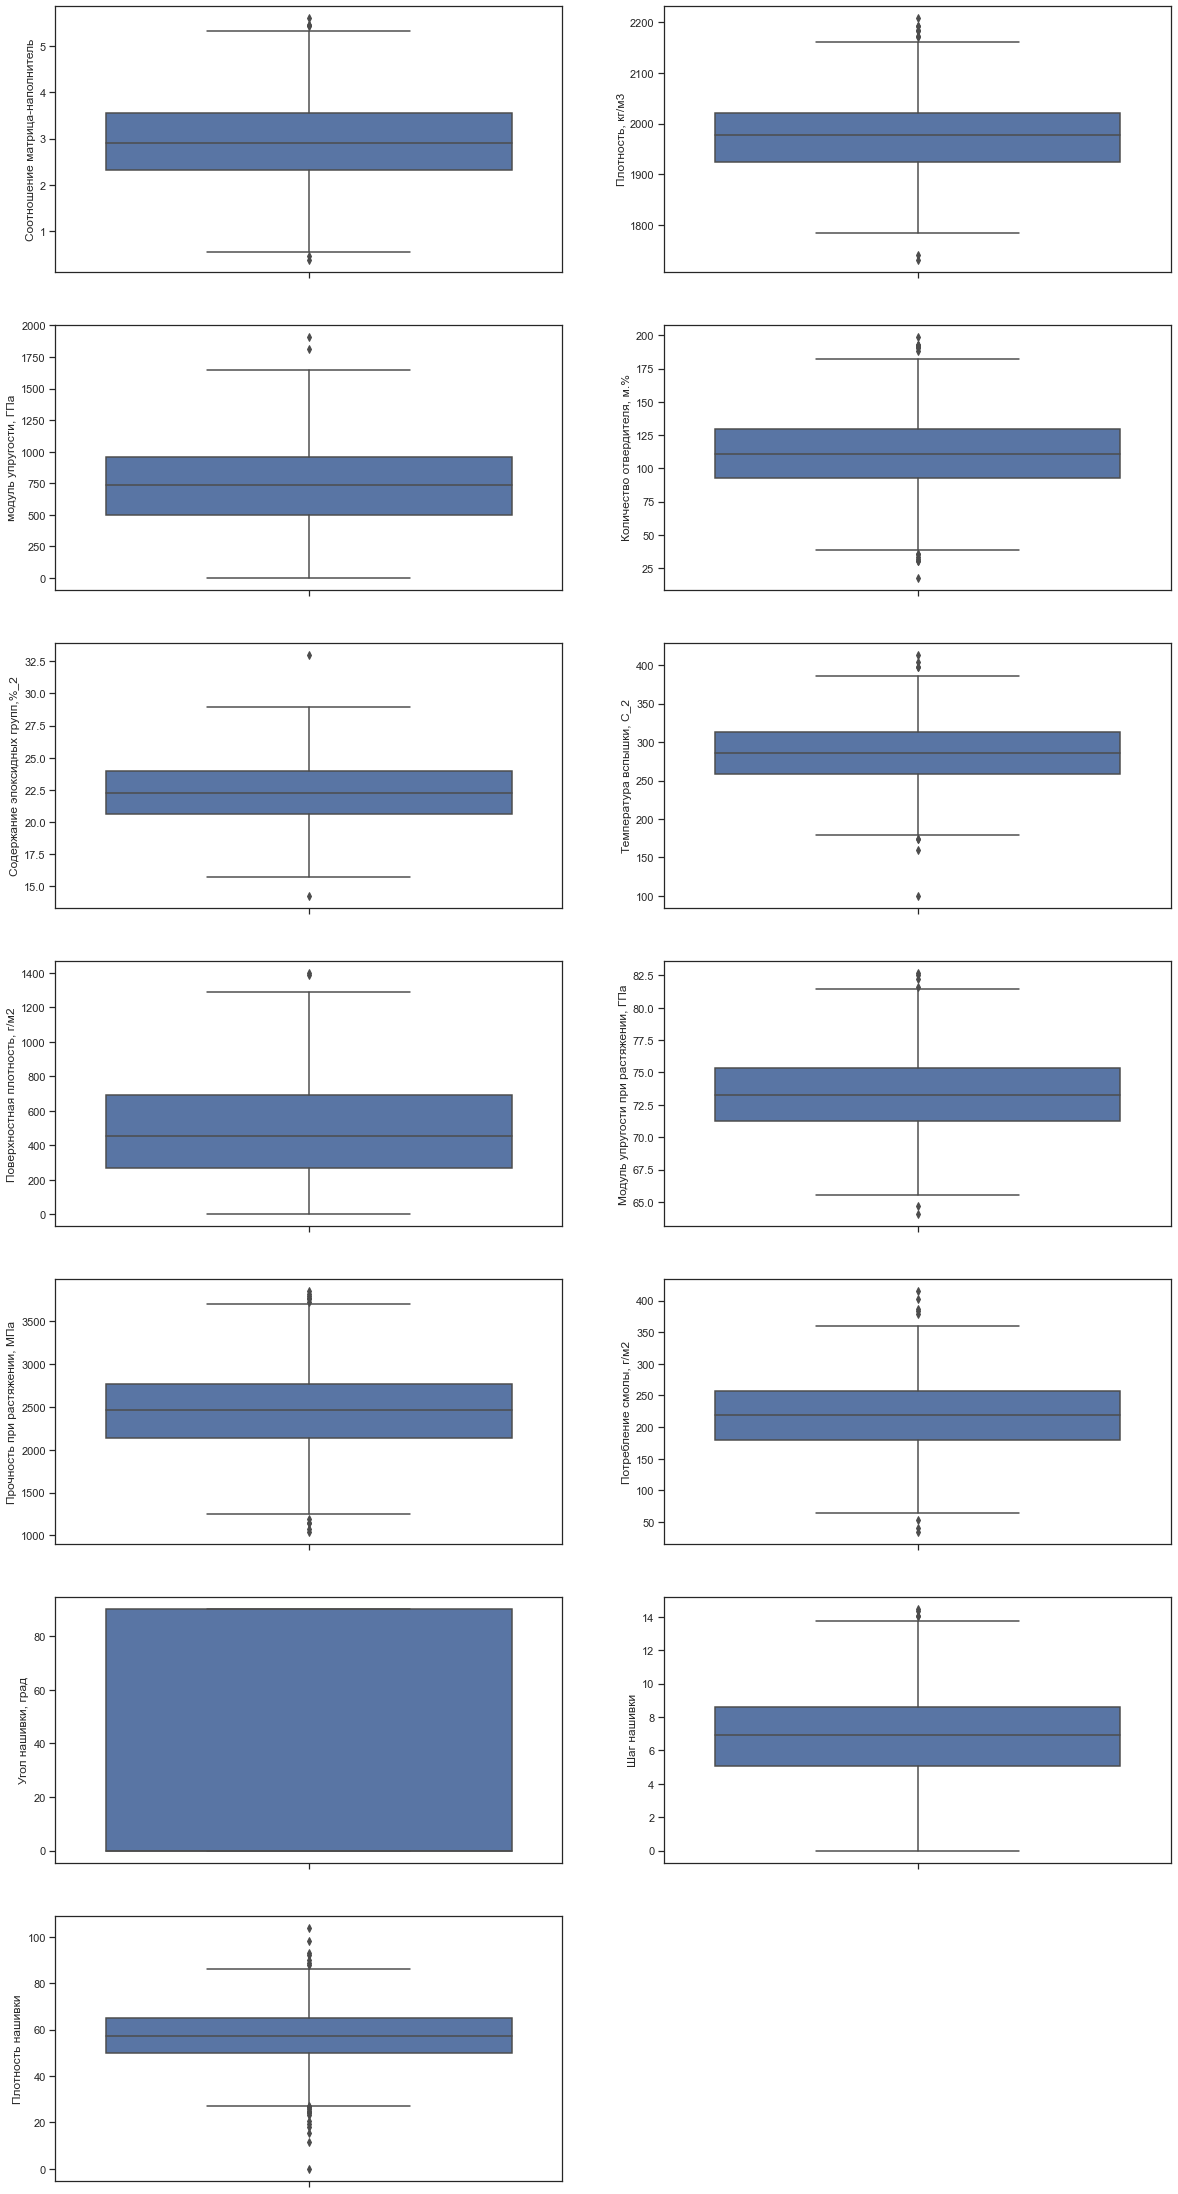

In [11]:
# оценка наличия выбросов и аномальных значений, а также их количества в столбцах исходного dataset
plt.figure(figsize=(20, 40))
i=1 
for name in data_ishod.columns:
    plt.subplot(7,2,i)
    sns.boxplot(y=data_ishod[name])
    outlier = boxplot_stats(data_ishod[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [12]:
list_columns=data_ishod.columns.to_list()

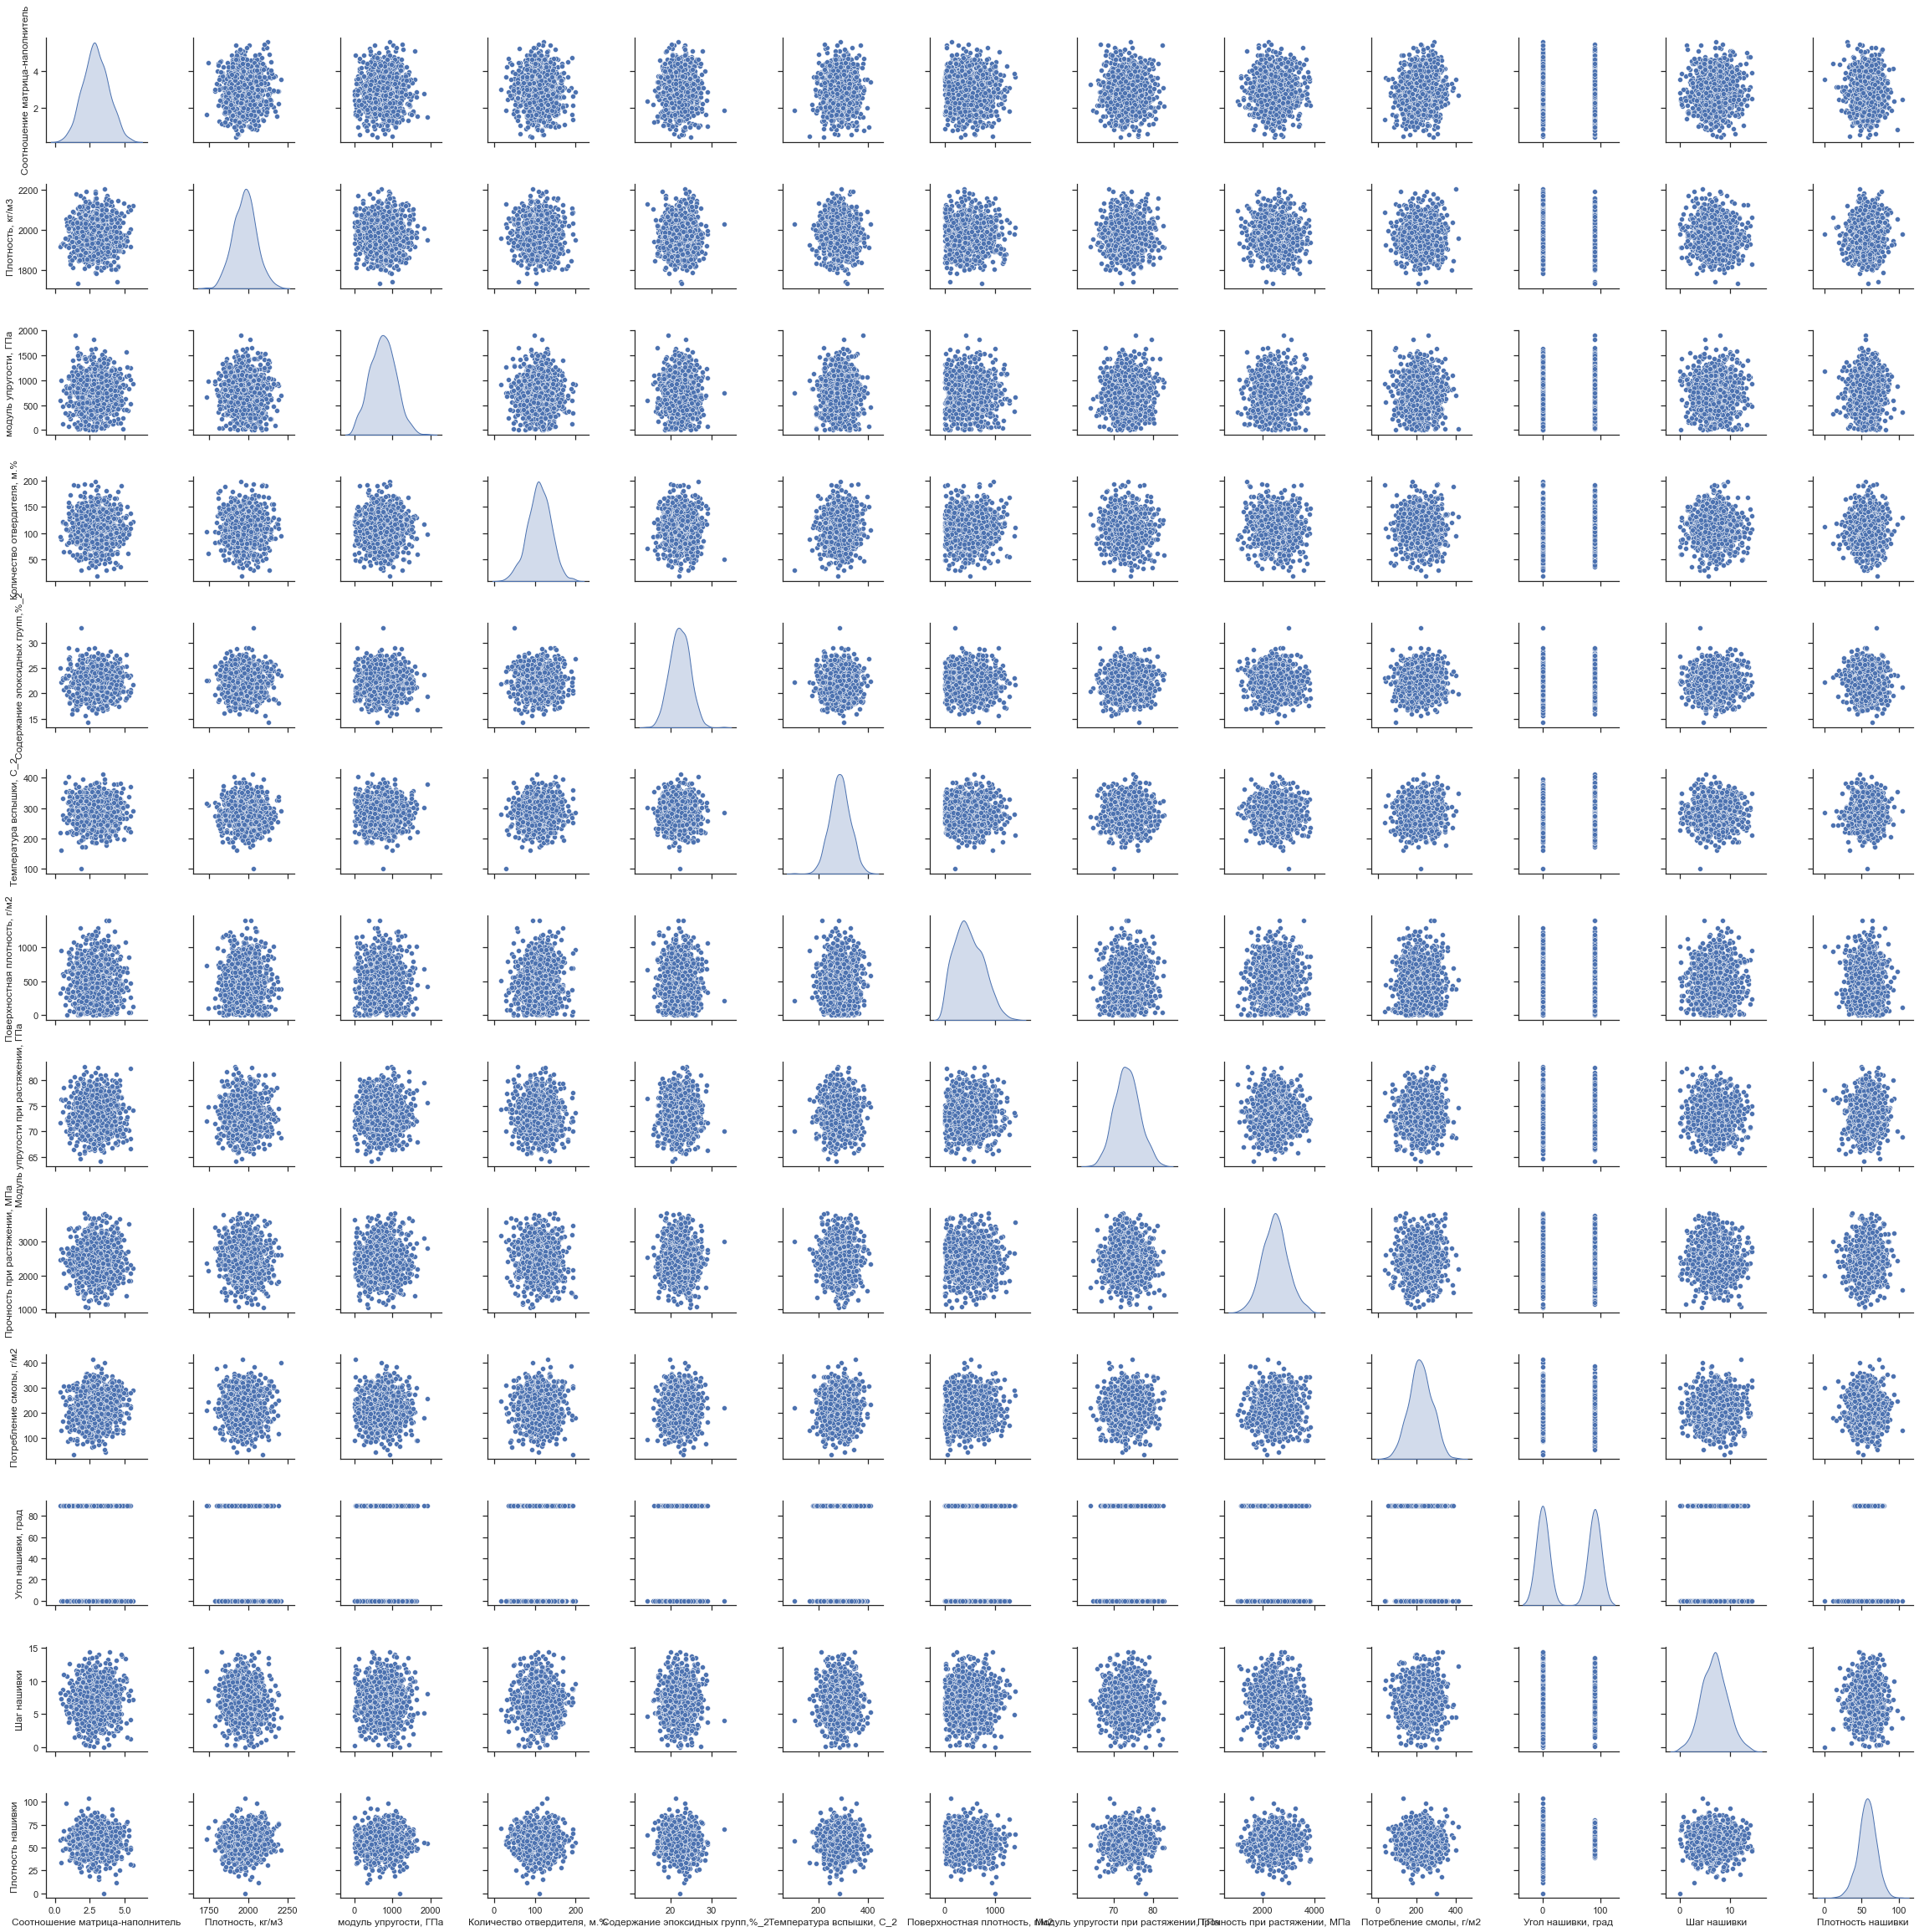

In [13]:
sns.pairplot(data_ishod,diag_kind='kde')

<AxesSubplot:>

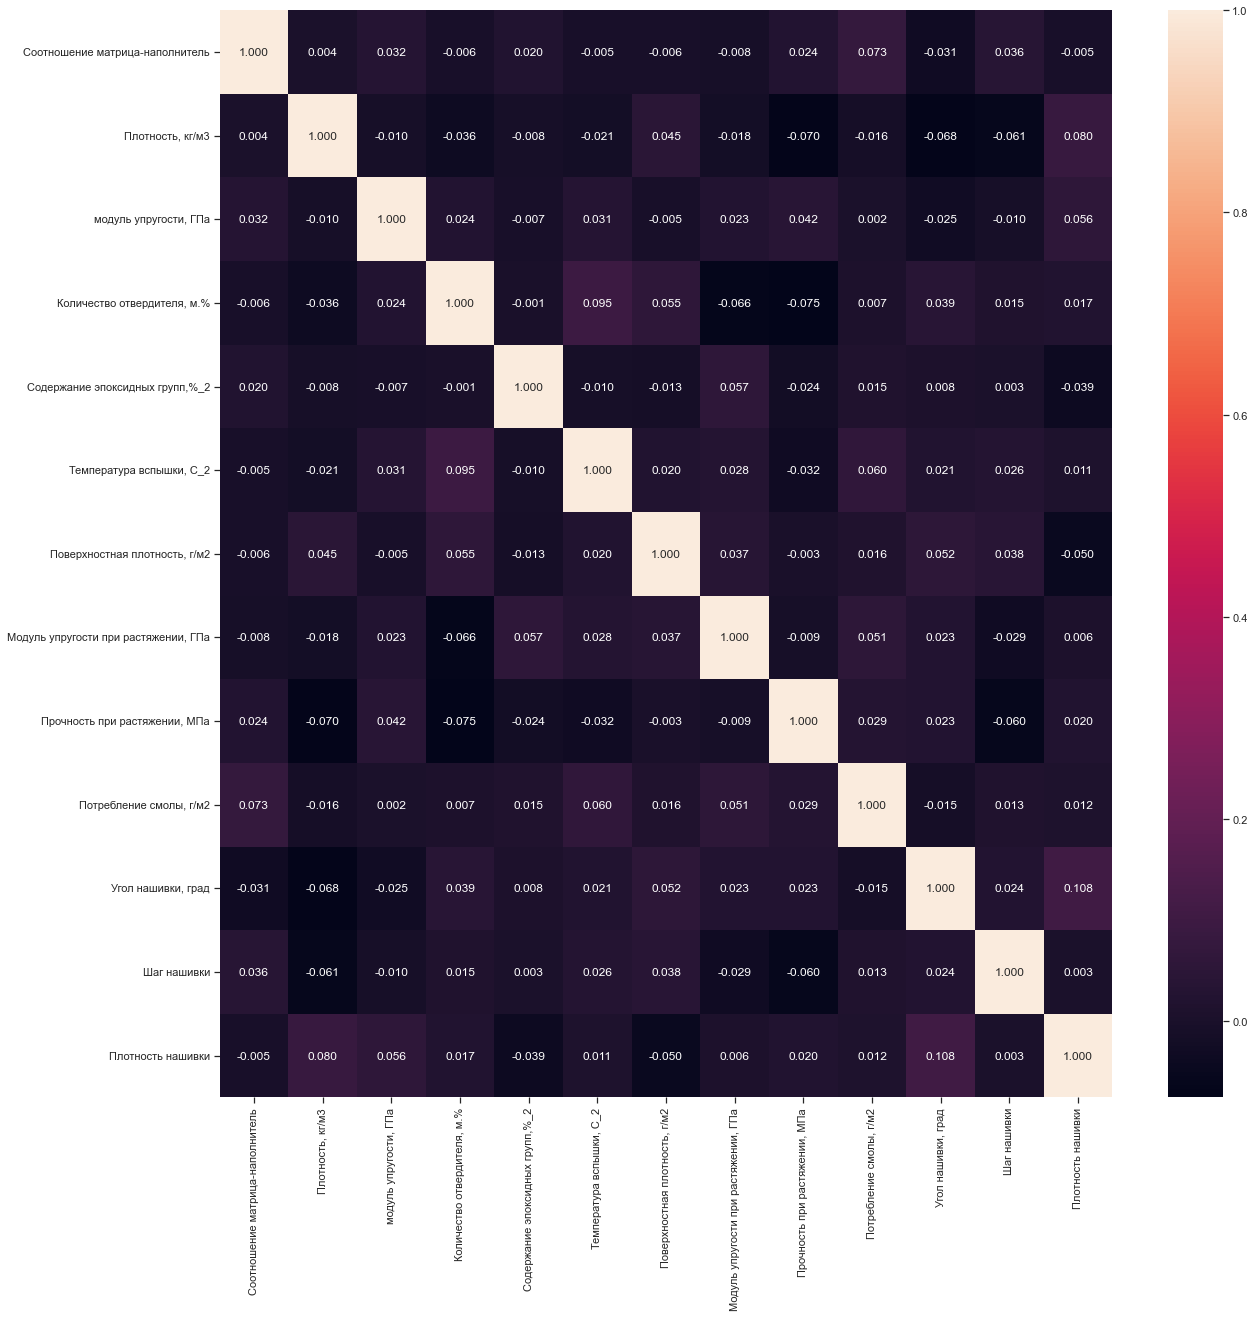

In [72]:
# Ковариационная матрица
plt.figure(figsize=(20, 20))
sns.heatmap(data_ishod.corr(), annot=True, fmt='.3f')

## Выводы к разделу 1
1. Исходный dataset состоит из 1023 строк и включает в себя 13 признаков из которых два являются целевыми.
2. Все признаки являются числовыми.
3. Исходный dataset не содержит пропущенных данных и дубликатов строк.
4. Все признаки за исключением "Угол нашивки, град" имеют уникальные данные
5. Признак "Угол нашивки, град" имеет два значения: 0 и 90. Возможно потребуется его перевести в категориальный признак.
6. Все признаки за исключением "Угол нашивки, град" имеют выбросы. Для повышения точности алгоритмов возможно прийдется удалить их
7. Все признаки очень слабокоррелированы как между собой так и с целевыми переменными. Целевые переменные между собой также слабокоррелированы.  


## Подготовка dataset  и запись его в папку Data

In [98]:
X = data_ishod.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.to_excel('./Data/X.xlsx')
X.shape

(1023, 11)

In [97]:
y = data_ishod[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

y.to_excel('./Data/y.xlsx')
y.shape

(1023, 2)